In [151]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [152]:
# Read the csv file into a pandas DataFrame
movies = pd.read_csv('Resources/final.csv')
movies.head()


,Unnamed: 0,budget,company,country,director,genre,gross,film,rating,released,...,year,Oscar Award Count,Oscar Nominations,star avg score,director avg score,writer avg score,Golden Globes Awards,Golden Globes Nominations,Total Nominations,Total Awards
0,0,30000000,Focus Features,USA,Shane Acker,Animation,31743332,9,PG-13,1987,...,2009,0.0,1.0,6.864286,7.100000,7.100000,0.0,1.0,2.0,0.0
1,1,35000000,Columbia Pictures,USA,Robert Luketic,Crime,81159365,21,PG-13,1988,...,2008,0.0,0.0,6.875000,5.957143,6.200000,0.0,1.0,1.0,0.0
2,2,1500000,Bow and Arrow Entertainment,UK,Rob Zombie,Horror,779820,31,R,1994,...,2016,0.0,0.0,5.900000,5.666667,5.666667,0.0,1.0,1.0,0.0
3,3,40000000,Warner Bros.,USA,Brian Helgeland,Biography,95001343,42,PG-13,1995,...,2013,0.0,0.0,7.500000,6.740000,6.630000,0.0,1.0,1.0,0.0
4,4,13000000,Dollface,USA,Mark Christopher,Drama,16574731,54,R,1999,...,1998,0.0,0.0,6.440000,5.800000,5.800000,0.0,1.0,1.0,0.0


In [153]:
clean = movies[['movie score', 'budget', 'gross','runtime', 'votes','star avg score', 'director avg score','writer avg score','Total Nominations', 'Total Awards']]
clean.head(3)

,movie score,budget,gross,runtime,votes,star avg score,director avg score,writer avg score,Total Nominations,Total Awards
0,7.1,30000000,31743332,79,117268,6.864286,7.100000,7.100000,2.0,0.0
1,6.8,35000000,81159365,123,201705,6.875000,5.957143,6.200000,1.0,0.0
2,5.0,1500000,779820,102,11945,5.900000,5.666667,5.666667,1.0,0.0


In [165]:
clean.to_csv('Resources/clean.csv')

In [154]:
# Use Pandas get_dummies to convert categorical data

### BEGIN SOLUTION
movies = pd.get_dummies(clean)
movies.head()
### END SOLUTION

,movie score,budget,gross,runtime,votes,star avg score,director avg score,writer avg score,Total Nominations,Total Awards
0,7.1,30000000,31743332,79,117268,6.864286,7.100000,7.100000,2.0,0.0
1,6.8,35000000,81159365,123,201705,6.875000,5.957143,6.200000,1.0,0.0
2,5.0,1500000,779820,102,11945,5.900000,5.666667,5.666667,1.0,0.0
3,7.5,40000000,95001343,128,71006,7.500000,6.740000,6.630000,1.0,0.0
4,5.8,13000000,16574731,93,28791,6.440000,5.800000,5.800000,1.0,0.0


In [155]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = movies.loc[:, movies.columns != 'movie score']
y = movies["movie score"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(6820, 9) (6820, 1)


In [156]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [157]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
### END SOLUTION

In [158]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

In [159]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

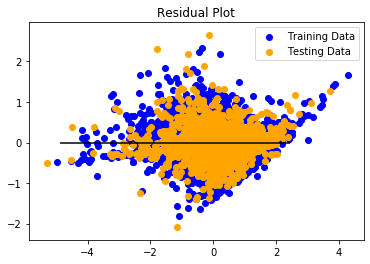

In [160]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [161]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.1585499471784876, R2: 0.8481151773297788


In [162]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.15990709869081993, R2: 0.8468150777683758


In [163]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.15854994857357055, R2: 0.8481151759933424


In [164]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.15913229304073684, R2: 0.8475573121296038
